<a href="https://colab.research.google.com/github/kunjkinger/machine-learning-projects/blob/time_series_analysis/Enerfy_holt_winters_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('EnergyProduction.csv',index_col=0,parse_dates=True)

In [ ]:
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 1970-01-01 to 1989-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EnergyIndex  240 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


In [ ]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

In [ ]:
df.index.freq = 'MS'

In [ ]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

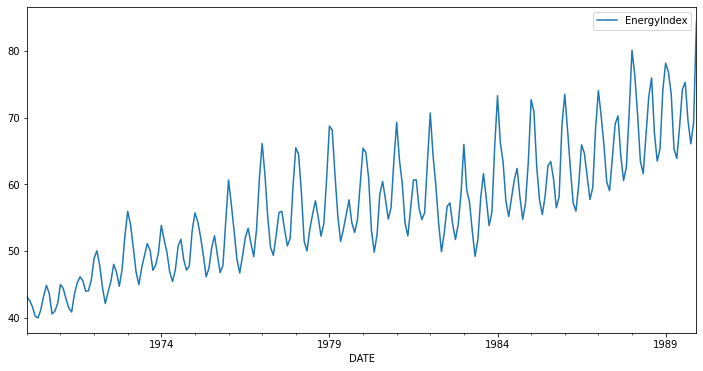

In [ ]:
df.plot(figsize=(12,6))

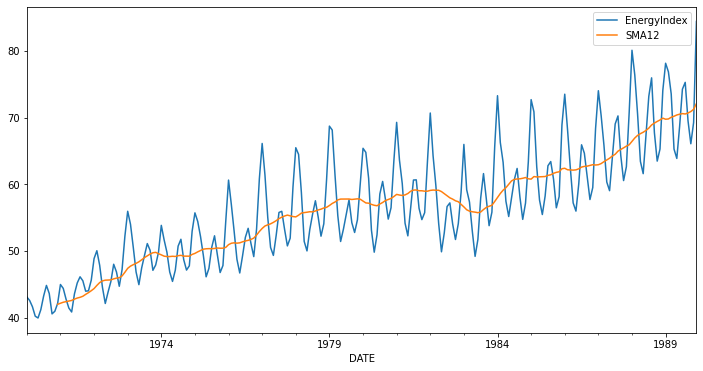

In [ ]:
df['SMA12'] = df['EnergyIndex'].rolling(window=12).mean()
df.plot(figsize=(12,6))

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

df['SE12'] = SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level=2/(12+1),optimized=False).fittedvalues.shift(-1)

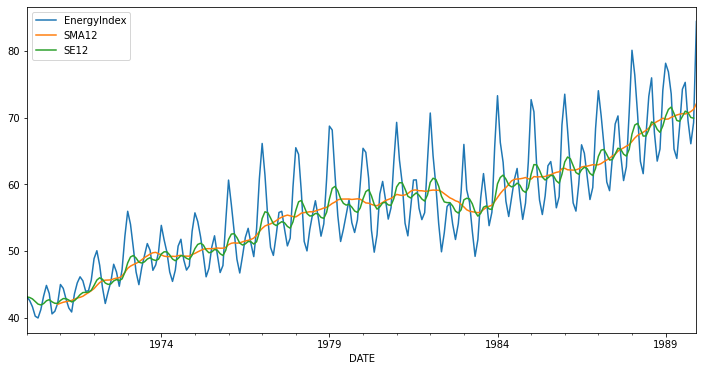

In [ ]:
df.plot(figsize=(12,6))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


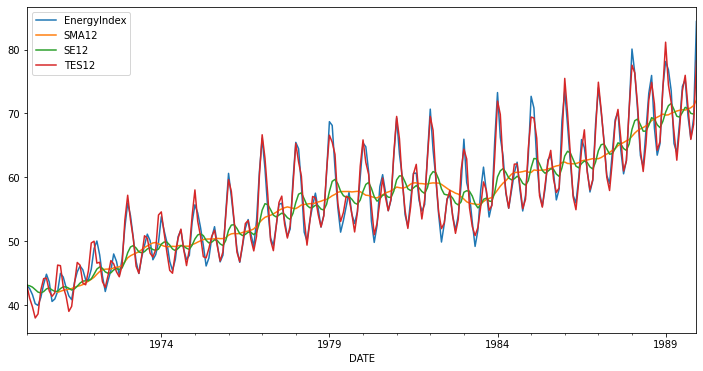

In [ ]:
#triple exponential
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['TES12'] = ExponentialSmoothing(df['EnergyIndex'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.plot(figsize=(12,6))

In [ ]:
df.columns

Index(['EnergyIndex', 'SMA12', 'SE12', 'TES12'], dtype='object')

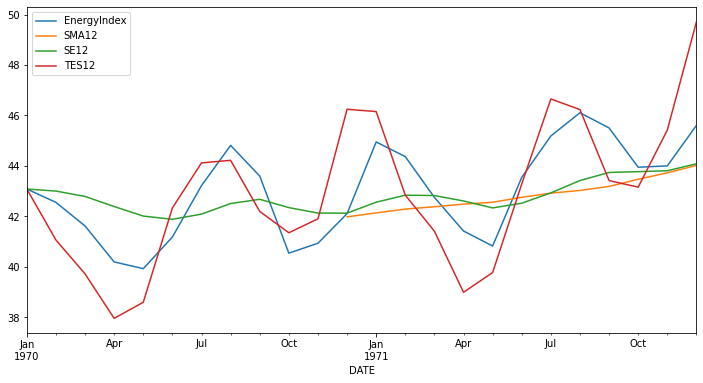

In [ ]:
#plotting the first 2 years
df[:'1971-12-31'].plot(figsize=(12,6))